## Datetime - epoch is from Unix time 0 (midnight 1/1/1970)

## PS2 - What day of the week was 1/1/1970

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
myArray = np.array([1,2,3,4,5,6,7])
mySeries = pd.Series(myArray)
mySeries.index = pd.date_range(start='1/1/1970', periods=7)
mySeries.index.dayofweek

Int64Index([3, 4, 5, 6, 0, 1, 2], dtype='int64')

## PS2 - UFO Data - Handling Time, Day of Week etc
### What day of the week has the most sightings?
### On the day with most sightings plot a histogram the time of day the sightings occured
### Do the same for the day with the 2nd most sightings
### For extra credit - Are there any deductions or patterns you see in the data? Justify with plots or data.

In [2]:
### Import Libraries and Load Data ###
import pandas as pd
import numpy as np
import matplotlib as plt
ufo = pd.read_csv('http://bit.ly/uforeports', parse_dates=['Time'])

### DAY OF WEEK WITH MOST SIGHTINGS ###
print(ufo)
days = ufo["Time"].dt.day_name()
daystats = days.describe()
print("The day of the week with the most sightings is "+  daystats['top'] + ".") 


                       City Colors Reported Shape Reported State  \
0                    Ithaca             NaN       TRIANGLE    NY   
1               Willingboro             NaN          OTHER    NJ   
2                   Holyoke             NaN           OVAL    CO   
3                   Abilene             NaN           DISK    KS   
4      New York Worlds Fair             NaN          LIGHT    NY   
...                     ...             ...            ...   ...   
18236            Grant Park             NaN       TRIANGLE    IL   
18237           Spirit Lake             NaN           DISK    IA   
18238           Eagle River             NaN            NaN    WI   
18239           Eagle River             RED          LIGHT    WI   
18240                  Ybor             NaN           OVAL    FL   

                     Time  
0     1930-06-01 22:00:00  
1     1930-06-30 20:00:00  
2     1931-02-15 14:00:00  
3     1931-06-01 13:00:00  
4     1933-04-18 19:00:00  
...            

In [3]:

ufo["Date"] = ufo["Time"].dt.date
datestats = ufo["Date"].describe()
popular = ufo.where(ufo["Date"] == datestats["top"]) 
popular = popular.dropna()
popular
popular["TimeOfDay"] = popular["Time"].dt.time

popular["TimeOfDay"].value_counts()




18:05:00    14
19:05:00     4
18:00:00     4
19:15:00     3
19:00:00     3
19:04:00     3
19:02:00     2
19:06:00     2
18:07:00     1
23:30:00     1
18:04:00     1
22:30:00     1
18:25:00     1
17:20:00     1
18:30:00     1
19:10:00     1
20:30:00     1
18:20:00     1
16:00:00     1
19:08:00     1
19:07:00     1
05:00:00     1
23:15:00     1
Name: TimeOfDay, dtype: int64

Pandas Version Installed 1.2.3


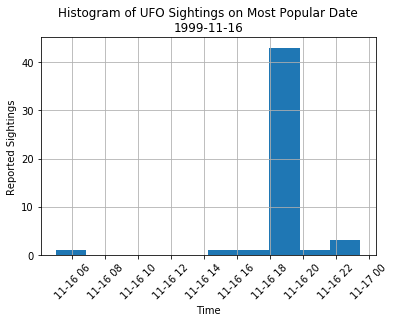

In [4]:
# Useful Import Statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# let's import the ufo data from the online collection
ufo = pd.read_csv('http://bit.ly/uforeports', parse_dates=['Time'])

# Let's create a new column of just the date information
ufo['Date'] = ufo['Time'].dt.date

# Filter to include only the dates on the top date 
# by frequency, and remove empty rows
datestats = ufo['Date'].describe()
popular = ufo.where(ufo['Date'] == datestats['top'])
popular = popular.dropna()

# build a new plot
fig, ax = plt.subplots()

# plot a histogram of the times
popular.hist(ax=ax, column="Time", xrot=45, figsize=(9, 6))

# all good plots have axes labels and titles
ax.set_title("Histogram of UFO Sightings on Most Popular Date\n{date}".format(date=datestats['top']))
ax.yaxis.set_label_text('Reported Sightings')
ax.xaxis.set_label_text('Time')

plt.show() # show the plot we've made

In [15]:
ufo["Date"] = ufo["Time"].dt.date
datestats = ufo["Date"].describe()
popularfreq = ufo.where(ufo['Date'] == datestats['freq'])

popularfreq

,City,Colors Reported,Shape Reported,State,Time,Date
12,NaN,NaN,NaN,NaN,NaT,NaN
19,NaN,NaN,NaN,NaN,NaT,NaN
36,NaN,NaN,NaN,NaN,NaT,NaN
44,NaN,NaN,NaN,NaN,NaT,NaN
82,NaN,NaN,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...
18213,NaN,NaN,NaN,NaN,NaT,NaN
18216,NaN,NaN,NaN,NaN,NaT,NaN
18220,NaN,NaN,NaN,NaN,NaT,NaN
18233,NaN,NaN,NaN,NaN,NaT,NaN


In [21]:

# removing the largest element from temp list
print(ufo)
days = ufo["Date"].dt.day_name()
daystats2 = days.describe()
daystats2





               City Colors Reported Shape Reported State                Time  \
12           Belton             RED         SPHERE    SC 1939-06-30 20:00:00   
19       Bering Sea             RED          OTHER    AK 1943-04-30 23:00:00   
36       Portsmouth             RED      FORMATION    VA 1945-07-10 01:30:00   
44        Blairsden           GREEN         SPHERE    CA 1946-06-30 19:00:00   
82         San Jose            BLUE        CHEVRON    CA 1947-07-15 21:00:00   
...             ...             ...            ...   ...                 ...   
18213      Pasadena           GREEN       FIREBALL    CA 2000-12-28 19:10:00   
18216  Garden Grove          ORANGE          LIGHT    CA 2000-12-29 16:10:00   
18220   Shasta Lake            BLUE           DISK    CA 2000-12-29 20:30:00   
18233     Anchorage             RED        VARIOUS    AK 2000-12-31 21:00:00   
18239   Eagle River             RED          LIGHT    WI 2000-12-31 23:45:00   

             Date  
12     1939-06-30  

AttributeError: Can only use .dt accessor with datetimelike values